__Assignment - Week 5__

__Name__: Runze Li

__net id__: rl50xx

We use Decision Tree Classifier to train PhishingVsBenignURL dataset using all of the features. Each time we use Gini Impurity or Entropy Impurity with the depth from 1 to 6. We can get the table which summarize the results:

|Depth|Gini Impurity|Entropy Impurity|
|:--:|:--:|:--:|
|1|0.38820121148274955|0.404793257835133|
|2|0.5146168027390045|0.5601790887542797|
|3|0.6281274690545168|0.6707927311035028|
|4|0.7005530682117461|0.7318936002106926|
|5|0.7548064261258889|0.8074795891493284|
|6|0.8161706610481959|0.8477745588622597|


The results shows that as the depth increases, the decision tree becomes more complex and can better fit the training data, which will cause that the accuracy can increase.

What's more, at the same depth, the accuracy of Entropy Impurity is generally higher than that of Gini Impurity.

From the two figures visualized by the tree of depth 2, we can see that using Gini Impurity and Entropy Impurity will have an impact on the generated decision tree. At the same number of layers, they use different features for decision-making.

### Using the Scikit-Learn Library train the Decision Tree Classifier to the attached PhishingVsBenignURL data set using all of the features at once. 

In [5]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz

#### Load data

(Dataset is originally from here: https://www.unb.ca/cic/datasets/url-2016.html )

In [6]:
df = pd.read_csv('DataSetForPhishingVSBenignUrl.csv')
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In fact, according to `df.head()`, we can find that some values in df are `NaN`. These values cannot be classified by decision trees, so we need to remove row data containing NaN values here.

In [7]:
# Check for NaN values in DataFrame
nan_values = df.isna().any()
print("Are there NaN values:", nan_values.any())

Are there NaN values: True


In [8]:
df = df.dropna()

In [9]:
print("Number of Samples:", df.shape[0])
print("Number of features:", df.shape[1])

Number of Samples: 18982
Number of features: 80


#### Split  data into train(80%) and test(20%) sets.

In [10]:
from collections import Counter
X = df.drop('URL_Type_obf_Type', axis=1)
y = df['URL_Type_obf_Type']
# print(X)
print(Counter(y))

Counter({'spam': 5342, 'malware': 4440, 'phishing': 4014, 'benign': 2709, 'Defacement': 2477})


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the Gini Impurity and Entropy impurity measures for each tree depth. 

Compare the results of these 12 cases and discuss your results.

To compare decision trees with different depths and impurity measures (Gini Impurity and Entropy), we'll need to train __12 decision trees.__

#### Gini Impurity

##### Depth = 1

In [12]:
tree_gini_1 = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=1)
tree_gini_1.fit(X_train, y_train)

y_pred_1 = tree_gini_1.predict(X_test)
print("Accuracy for Decision Tree with criteria as Gini Index and depth 1 is:", accuracy_score(y_test,y_pred_1))

Accuracy for Decision Tree with criteria as Gini Index and depth 1 is: 0.38820121148274955


##### Depth = 2

In [13]:
tree_gini_2 = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=2)
tree_gini_2.fit(X_train, y_train)

y_pred_2 = tree_gini_2.predict(X_test)
print("Accuracy for Decision Tree with criteria as Gini Index and depth 2 is:", accuracy_score(y_test,y_pred_2))

Accuracy for Decision Tree with criteria as Gini Index and depth 2 is: 0.5146168027390045


##### Depth = 3

In [14]:
tree_gini_3 = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=3)
tree_gini_3.fit(X_train, y_train)

y_pred_3 = tree_gini_3.predict(X_test)
print("Accuracy for Decision Tree with criteria as Gini Index and depth 3 is:", accuracy_score(y_test,y_pred_3))

Accuracy for Decision Tree with criteria as Gini Index and depth 3 is: 0.6281274690545168


##### Depth = 4

In [15]:
tree_gini_4 = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=4)
tree_gini_4.fit(X_train, y_train)

y_pred_4 = tree_gini_4.predict(X_test)
print("Accuracy for Decision Tree with criteria as Gini Index and depth 4 is:", accuracy_score(y_test,y_pred_4))

Accuracy for Decision Tree with criteria as Gini Index and depth 4 is: 0.7005530682117461


##### Depth = 5

In [16]:
tree_gini_5 = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=5)
tree_gini_5.fit(X_train, y_train)

y_pred_5 = tree_gini_5.predict(X_test)
print("Accuracy for Decision Tree with criteria as Gini Index and depth 5 is:", accuracy_score(y_test,y_pred_5))

Accuracy for Decision Tree with criteria as Gini Index and depth 5 is: 0.7548064261258889


##### Depth = 6

In [17]:
tree_gini_6 = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=6)
tree_gini_6.fit(X_train, y_train)

y_pred_6 = tree_gini_6.predict(X_test)
print("Accuracy for Decision Tree with criteria as Gini Index and depth 6 is:", accuracy_score(y_test,y_pred_6))

Accuracy for Decision Tree with criteria as Gini Index and depth 6 is: 0.8161706610481959


#### Entropy Impurity

##### Depth = 1

In [18]:
tree_entropy_1 = DecisionTreeClassifier(criterion="entropy", random_state=50, max_depth=1)
tree_entropy_1.fit(X_train, y_train)

y_pred_1 = tree_entropy_1.predict(X_test)
print("Accuracy for Decision Tree with criteria as Entropy and depth 1 is:", accuracy_score(y_test,y_pred_1))

Accuracy for Decision Tree with criteria as Entropy and depth 1 is: 0.404793257835133


##### Depth = 2

In [19]:
tree_entropy_2 = DecisionTreeClassifier(criterion="entropy", random_state=50, max_depth=2)
tree_entropy_2.fit(X_train, y_train)

y_pred_2 = tree_entropy_2.predict(X_test)
print("Accuracy for Decision Tree with criteria as Entropy and depth 2 is:", accuracy_score(y_test,y_pred_2))

Accuracy for Decision Tree with criteria as Entropy and depth 2 is: 0.5601790887542797


##### Depth = 3

In [20]:
tree_entropy_3 = DecisionTreeClassifier(criterion="entropy", random_state=50, max_depth=3)
tree_entropy_3.fit(X_train, y_train)

y_pred_3 = tree_entropy_3.predict(X_test)
print("Accuracy for Decision Tree with criteria as Entropy and depth 3 is:", accuracy_score(y_test,y_pred_3))

Accuracy for Decision Tree with criteria as Entropy and depth 3 is: 0.6707927311035028


##### Depth = 4

In [21]:
tree_entropy_4 = DecisionTreeClassifier(criterion="entropy", random_state=50, max_depth=4)
tree_entropy_4.fit(X_train, y_train)

y_pred_4 = tree_entropy_4.predict(X_test)
print("Accuracy for Decision Tree with criteria as Entropy and depth 4 is:", accuracy_score(y_test,y_pred_4))

Accuracy for Decision Tree with criteria as Entropy and depth 4 is: 0.7318936002106926


##### Depth = 5

In [22]:
tree_entropy_5 = DecisionTreeClassifier(criterion="entropy", random_state=50, max_depth=5)
tree_entropy_5.fit(X_train, y_train)

y_pred_5 = tree_entropy_5.predict(X_test)
print("Accuracy for Decision Tree with criteria as Entropy and depth 5 is:", accuracy_score(y_test,y_pred_5))

Accuracy for Decision Tree with criteria as Entropy and depth 5 is: 0.8074795891493284


##### Depth = 6

In [23]:
tree_entropy_6 = DecisionTreeClassifier(criterion="entropy", random_state=50, max_depth=6)
tree_entropy_6.fit(X_train, y_train)

y_pred_6 = tree_entropy_6.predict(X_test)
print("Accuracy for Decision Tree with criteria as Entropy and depth 6 is:", accuracy_score(y_test,y_pred_6))

Accuracy for Decision Tree with criteria as Entropy and depth 6 is: 0.8477745588622597


#### Draw the results

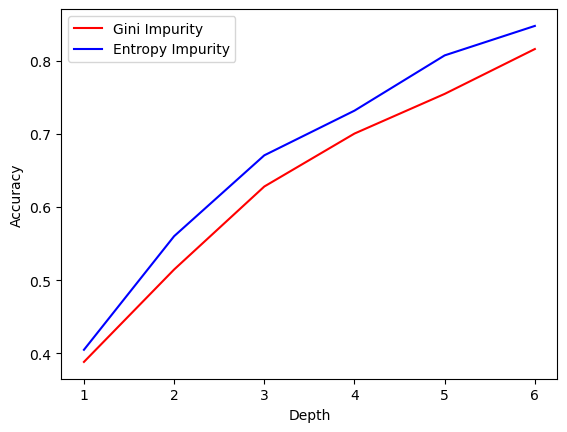

In [24]:
gini_accuracies = []
entropy_accuracies = []
depth = [1, 2, 3, 4, 5, 6]

for d in depth:
    tree_gini = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=d)
    tree_gini.fit(X_train, y_train)
    y_pred = tree_gini.predict(X_test)
    gini_accuracies.append(accuracy_score(y_test, y_pred))
    tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=50, max_depth=d)
    tree_entropy.fit(X_train, y_train)
    y_pred = tree_entropy.predict(X_test)
    entropy_accuracies.append(accuracy_score(y_test, y_pred))
    
plt.plot(depth, gini_accuracies, label='Gini Impurity', color='r')
plt.plot(depth, entropy_accuracies, label='Entropy Impurity', color='b')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The results shows that as the depth increases, the decision tree becomes more complex and can better fit the training data. The choices can affect the splits made during training, which in turn can influence the tree's performance.

In addition, from the figure drawn above, we can see that at the same depth, the accuracy of Entropy Impurity is generally higher than that of Gini Impurity due to the fact that Entropy does log calculations and is a more expensive computation.

### Take the best performing tree of depth 2 from above. Visualize the tree and discuss your observations. 

(For visualizing decision trees see: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

In [25]:
feature_names = df.columns[:79]
# _, class_names = pd.factorize(df.iloc[:, 79])
class_names = y.unique()
print(feature_names)
print(class_names)

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

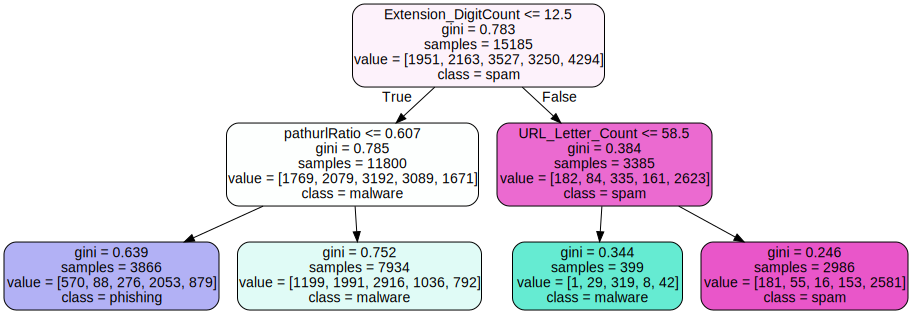

In [26]:
# Visualizing the Gini Index based Decision Tree
tree_gini_2 = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=2)
tree_gini_2.fit(X_train, y_train)
graph_data = tree.export_graphviz(tree_gini_2, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

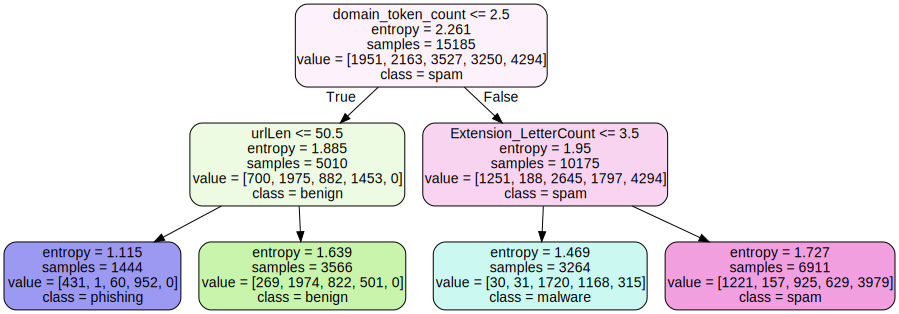

In [27]:
# Visualizing the Entropy based Decision Tree
tree_entropy_2 = DecisionTreeClassifier(criterion="entropy", random_state=50, max_depth=2)
tree_entropy_2.fit(X_train, y_train)
graph_data = tree.export_graphviz(tree_entropy_2, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

From the two figures, we can see that features closer to the root node are typically more important in making classification decisions. 

What's more, using Gini Impurity and Entropy Impurity will have an impact on the generated decision tree. At the same number of layers, they use different features for decision-making.